<a href="https://colab.research.google.com/github/raulbenitez/DAPR/blob/master/GMM__model_selection_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model selection in clustering: How many clusters?

Generate synthetic test data

In [27]:
from sklearn.datasets import make_blobs
from sklearn import mixture
import matplotlib.pyplot as plt
import numpy as np

n_clusters = 6
n_samples = 50
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=2,random_state=random_state)


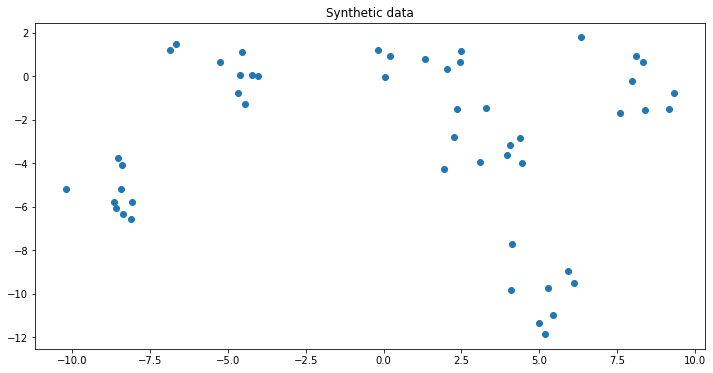

In [28]:
fig = plt.figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Synthetic data")
plt.show()

Fit different GMM models with different number of Gaussians and choos the model with lowest BIC

$BIC = -2\ln \hat{\mathcal{L}} + k\ln(n)$ 

with $\hat{\mathcal{L}}$ : maximum likelihood function, 
K number of parameters in each model and n number of samples 

In [29]:
NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(X)
    bic.append(gmm.bic(X))
    print(bic)

[616.6929053334437]
[616.6929053334437, 590.5640573959911]
[616.6929053334437, 590.5640573959911, 575.8605064683408]
[616.6929053334437, 590.5640573959911, 575.8605064683408, 561.2906752828216]
[616.6929053334437, 590.5640573959911, 575.8605064683408, 561.2906752828216, 553.650439020301]
[616.6929053334437, 590.5640573959911, 575.8605064683408, 561.2906752828216, 553.650439020301, 568.1685121652217]
[616.6929053334437, 590.5640573959911, 575.8605064683408, 561.2906752828216, 553.650439020301, 568.1685121652217, 579.2139525681634]
[616.6929053334437, 590.5640573959911, 575.8605064683408, 561.2906752828216, 553.650439020301, 568.1685121652217, 579.2139525681634, 588.2853297408449]
[616.6929053334437, 590.5640573959911, 575.8605064683408, 561.2906752828216, 553.650439020301, 568.1685121652217, 579.2139525681634, 588.2853297408449, 576.7083357964939]
[616.6929053334437, 590.5640573959911, 575.8605064683408, 561.2906752828216, 553.650439020301, 568.1685121652217, 579.2139525681634, 588.2853

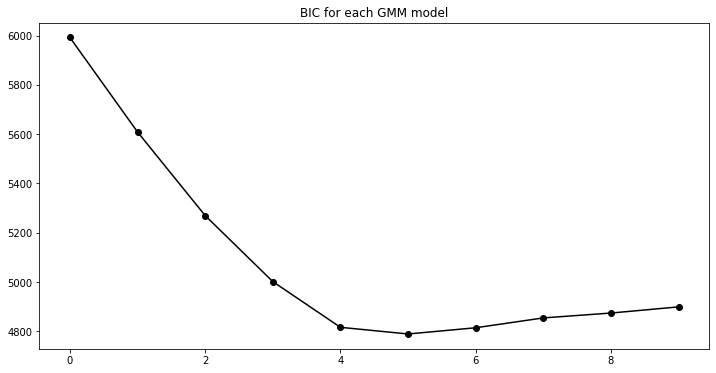

In [18]:
fig = plt.figure(figsize=(12,6))
plt.plot(bic,'ko-')
plt.title("BIC for each GMM model")
plt.show()

Choose the best model:

In [22]:
idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(X)

...and the winner is GMM model G = 6


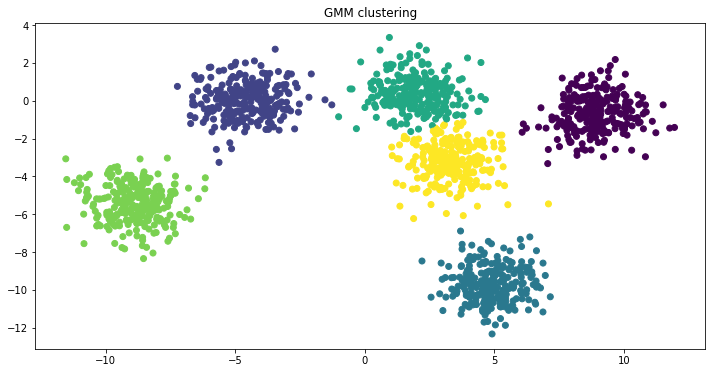

In [23]:
fig = plt.figure(figsize=(12,6))
y_pred_gmm = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_gmm)
plt.title("GMM clustering")
plt.show()

Play with the location and variance of the clusters

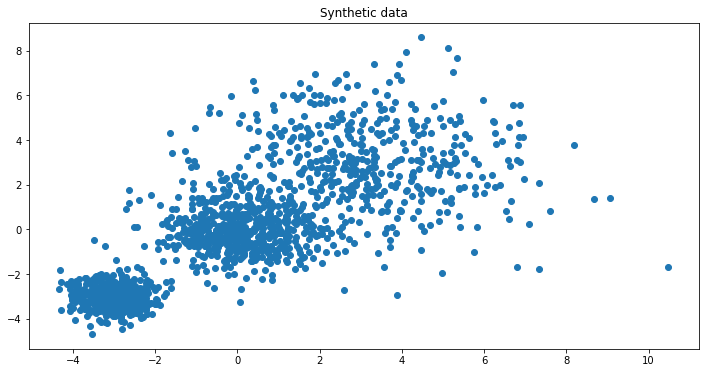

In [25]:
X, y = make_blobs(n_samples=n_samples, centers=[[-3,-3],[0,0],[3,3]], cluster_std = [0.5,1,2], n_features=2,random_state=random_state)
fig = plt.figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Synthetic data")
plt.show()

[13182.169258730622]
[13182.169258730622, 12392.168645761754]
[13182.169258730622, 12392.168645761754, 11427.941713848124]
[13182.169258730622, 12392.168645761754, 11427.941713848124, 11469.152050035003]
[13182.169258730622, 12392.168645761754, 11427.941713848124, 11469.152050035003, 11511.357961106885]
[13182.169258730622, 12392.168645761754, 11427.941713848124, 11469.152050035003, 11511.357961106885, 11545.403908061304]
[13182.169258730622, 12392.168645761754, 11427.941713848124, 11469.152050035003, 11511.357961106885, 11545.403908061304, 11578.375236817245]
[13182.169258730622, 12392.168645761754, 11427.941713848124, 11469.152050035003, 11511.357961106885, 11545.403908061304, 11578.375236817245, 11623.808605401187]
[13182.169258730622, 12392.168645761754, 11427.941713848124, 11469.152050035003, 11511.357961106885, 11545.403908061304, 11578.375236817245, 11623.808605401187, 11664.758953620343]
[13182.169258730622, 12392.168645761754, 11427.941713848124, 11469.152050035003, 11511.3579

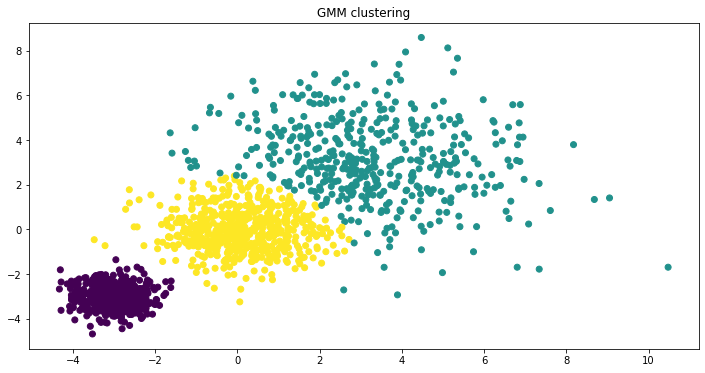

In [26]:
NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(X)
    bic.append(gmm.bic(X))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(X)

fig = plt.figure(figsize=(12,6))
y_pred_gmm = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_gmm)
plt.title("GMM clustering")
plt.show()
